In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import time
import matplotlib.pyplot as plt

import numpy as np

import denoise
import noise_estimator
import util_plot
#import caiman as cm

In [2]:
from skimage import io
mov = io.imread('example_movies/demoMovie.tif').transpose([1,2,0])
print(mov.shape)

(60, 80, 2000)


### Spatial denoiser

To denoise the video spatially, we employ an anisotropic Wiener Filter. Each pixel is denoised by strengthening its covariance with neighboring pixels, but accounting for the different noise levels estimated for each pixel in the group via their PSD.

In [3]:
mov_wf = denoise.spatial(mov, gHalf=[2,2])

first 0/4800 pixels
first 1000/4800 pixels
first 2000/4800 pixels
first 3000/4800 pixels
first 4000/4800 pixels


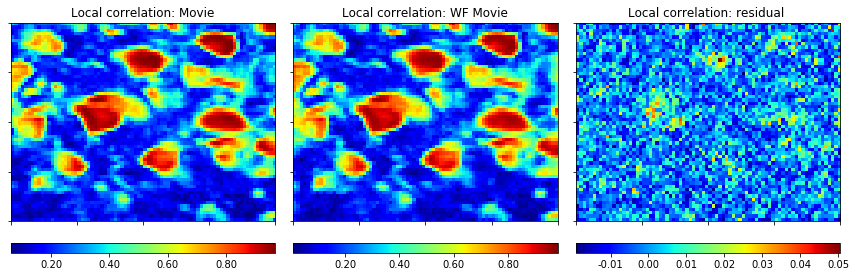

In [4]:
util_plot.comparison_plot([mov, mov_wf],
                          option='corr',
                          titles_=['Movie', 'WF Movie'],
                          plot_orientation='vertical',
                          cbar_orientation='horizontal'
                         )

### Temporal denoiser

The video can be denoised temporally through block PCA. We begin by subtracting the mean and normalizing each pixel by the noise variance. The video is partitioned in tiles (~ soma size). PCA is applied to each tile to extract spatial and temporal components. The temporal components with Gaussian like autocorrelation are rejected. When the SNR is low, some block artifacts can be present. To compensate for this, we run this approach 3x more using 1/2 off grids (row-,column-, and row&column- wise) of the original block partitions. The then average these results to obtain a single denoised movie.

In [5]:
noise_level = denoise.noise_level(mov_wf,
                                  range_ff=[0.25,0.5])
mov_nn = mov_wf/noise_level[:,:,np.newaxis]

Partition the movie in tiles smaller than the avg soma size.

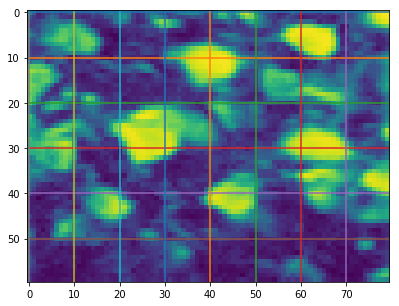

In [6]:
nblocks=[6,8]
Cn1,_ = util_plot.correlation_pnr(mov_nn)
util_plot.tiling_grid_plot(Cn1,
                           nblocks=nblocks,
                           plot_option='same')

Set dx to either {1,4} (number of denoisers) depending on SNR.<br/>
We begin by running the denoiser as vanilla PCA (greedy= False).<br/>
See function comments for detailed descriptions.<br/>

In [7]:
mov_d,ranks = denoise.temporal(mov_nn,
                               nblocks=nblocks,
                               greedy= False,
                               dx=4)

Running 48 blocks in 22 cpus
	rank:15	run_time: 2.426854
	rank:12	run_time: 2.746028
	rank:15	run_time: 2.783847
	rank:17	run_time: 2.814094
	rank:16	run_time: 2.813351
	rank:17	run_time: 2.862876
	rank:18	run_time: 2.852817
	rank:24	run_time: 2.847127
	rank:17	run_time: 2.862602
	rank:23	run_time: 2.833504
	rank:14	run_time: 2.862768
	rank:18	run_time: 2.848235
	rank:21	run_time: 2.872604
	rank:20	run_time: 2.898999
	rank:20	run_time: 2.863546
	rank:16	run_time: 2.851360
	rank:16	run_time: 2.874455
	rank:17	run_time: 2.911153
	rank:17	run_time: 2.807155
	rank:11	run_time: 2.836020
	rank:10	run_time: 2.863011
	rank:15	run_time: 2.862196
	rank:23	run_time: 2.641693
	rank:18	run_time: 2.706512
	rank:16	run_time: 2.748575
	rank:17	run_time: 2.854114
	rank:14	run_time: 2.830274
	rank:17	run_time: 2.824961
	rank:24	run_time: 2.834913
	rank:16	run_time: 2.862162
	rank:14	run_time: 2.831779
	rank:18	run_time: 2.862383
	rank:8	run_time: 2.787149
	rank:13	run_time: 2.776903
	rank:19	run_time: 2

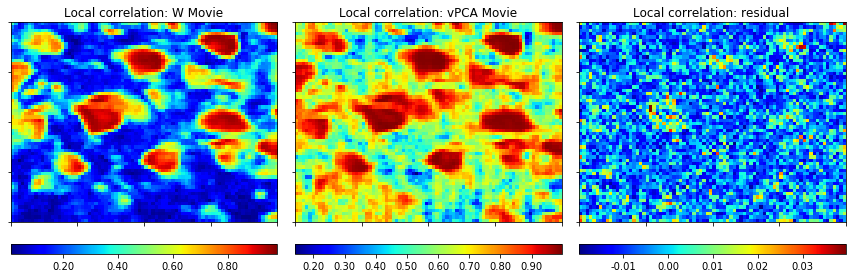

In [8]:
util_plot.comparison_plot([mov_nn, mov_d],
                          option='corr',
                          titles_=['W Movie', 'vPCA Movie'],
                          plot_orientation='vertical',
                          cbar_orientation='horizontal'
                         )

Visualize rank of each tile

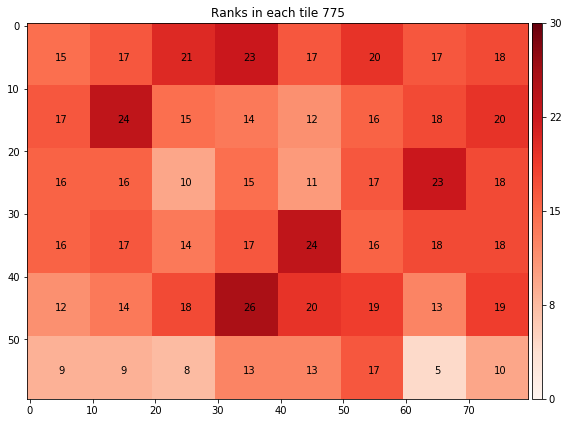

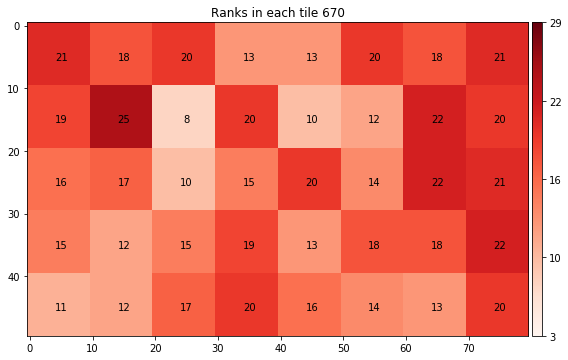

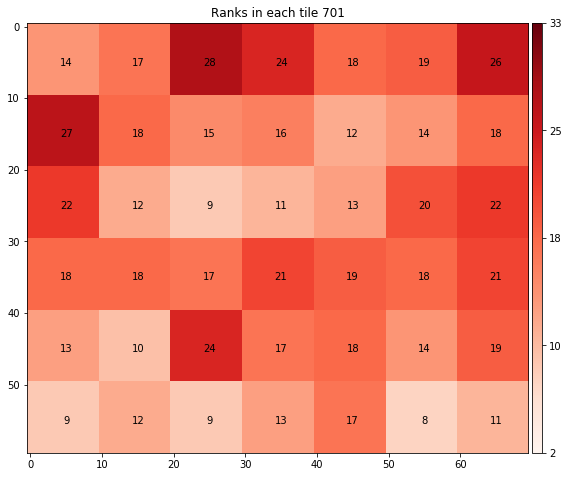

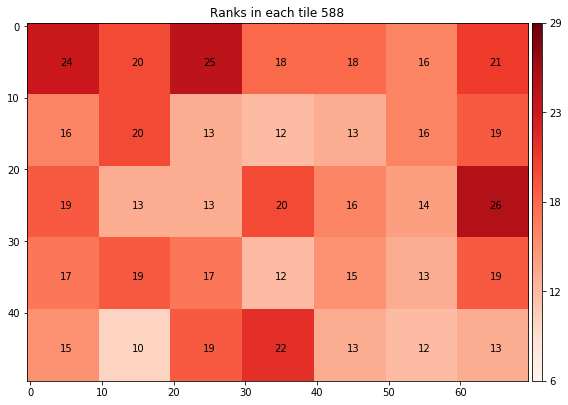

In [9]:
dims =mov_nn.shape
_ = util_plot.cn_ranks_dx_plot(ranks,dims,
                               nblocks=nblocks,
                               figsize=8,
                               fontsize=10)

Run greedy denoiser

In [10]:
mov_d,ranks = denoise.temporal(mov_nn,
                               nblocks=nblocks,
                               greedy= True,
                               dx=4)

Running 48 blocks in 22 cpus
	rank:14	run_time: 2.391290
	rank:17	run_time: 2.699624
	rank:18	run_time: 2.853002
	rank:17	run_time: 2.858304
	rank:24	run_time: 2.839183
	rank:20	run_time: 2.889311
	rank:18	run_time: 2.866171
	rank:15	run_time: 2.944510
	rank:23	run_time: 2.916762
	rank:21	run_time: 2.911562
	rank:17	run_time: 2.898313
	rank:12	run_time: 2.918834
	rank:17	run_time: 2.977217
	rank:16	run_time: 2.865636
	rank:11	run_time: 2.829674
	rank:17	run_time: 2.992207
	rank:20	run_time: 2.934220
	rank:15	run_time: 2.996905
	rank:16	run_time: 2.920950
	rank:16	run_time: 2.983816
	rank:10	run_time: 2.953993
	rank:15	run_time: 2.968747
	rank:23	run_time: 2.514218
	rank:18	run_time: 2.686481
	rank:26	run_time: 2.716187
	rank:24	run_time: 2.768077
	rank:16	run_time: 2.896987
	rank:17	run_time: 2.916529
	rank:14	run_time: 2.934114
	rank:17	run_time: 2.883566
	rank:12	run_time: 2.867658
	rank:18	run_time: 2.883754
	rank:18	run_time: 2.883315
	rank:14	run_time: 2.872160
	rank:20	run_time: 

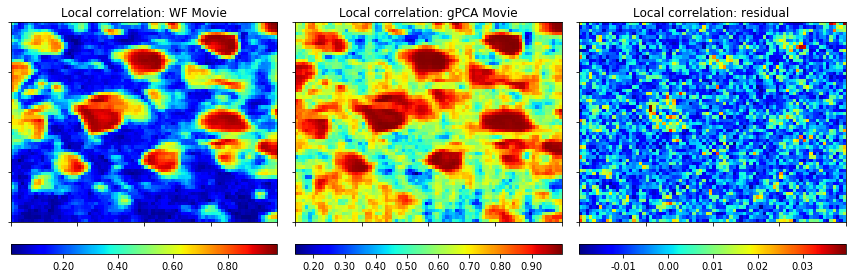

In [11]:
util_plot.comparison_plot([mov_nn, mov_d],
                          option='corr',
                          titles_=['WF Movie', 'gPCA Movie'],
                          plot_orientation='vertical',
                          cbar_orientation='horizontal'
                         )

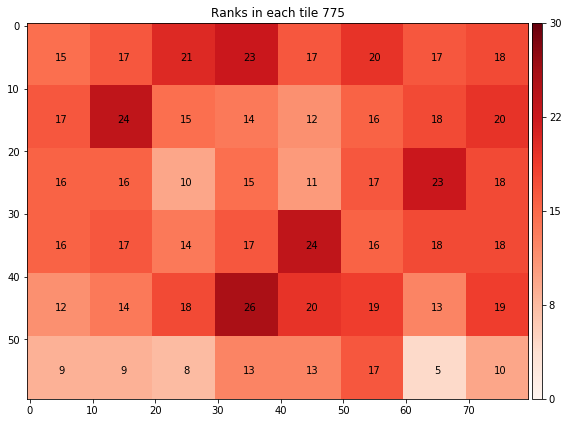

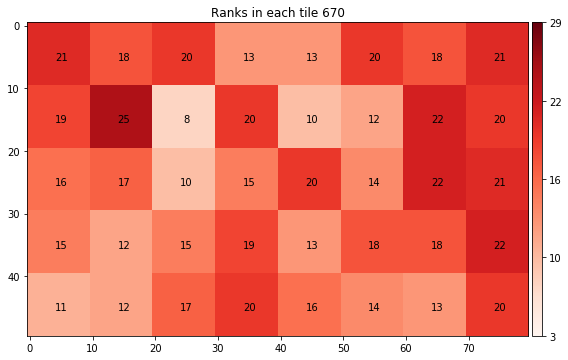

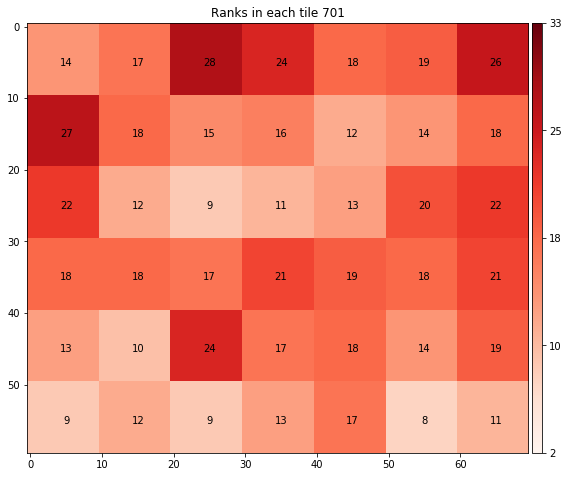

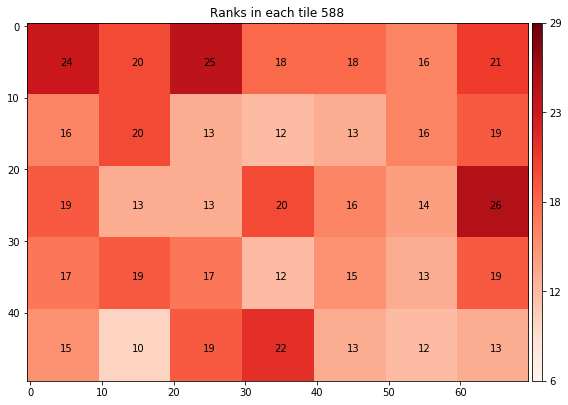

In [12]:
dims =mov_nn.shape
_ = util_plot.cn_ranks_dx_plot(ranks,
                               dims,
                               nblocks=nblocks,
                               figsize=8,
                               fontsize=10)

Reconstruct movie for final comparison

In [13]:
mov_den = mov_d*noise_level[:,:,np.newaxis]

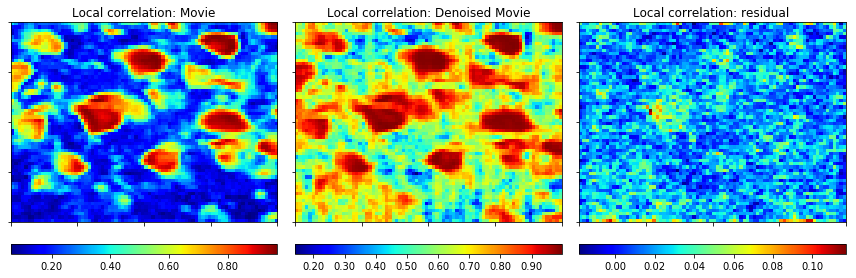

In [14]:
util_plot.comparison_plot([mov, mov_den],
                          option='corr',
                          titles_=['Movie', 'Denoised Movie'],
                          plot_orientation='vertical',
                          cbar_orientation='horizontal'
                         )